# Data analysis

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy import optimize

## Python introduction

Data types, basic operations, for, while, if, containers

## Plotting

### Line plot

- plot various $y=f(x)$ in same plot
- create subplots

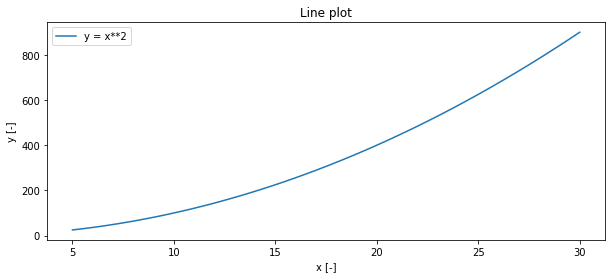

In [5]:
x = np.linspace(5, 30, 100)

plt.figure(figsize=(10, 4))
plt.plot(x, x ** 2, label="y = x**2")
plt.title("Line plot")
plt.legend()
plt.xlabel("x [-]")
plt.ylabel("y [-]")
plt.show()

### Scatter plot

- put multiple random variables in a single scatter plot

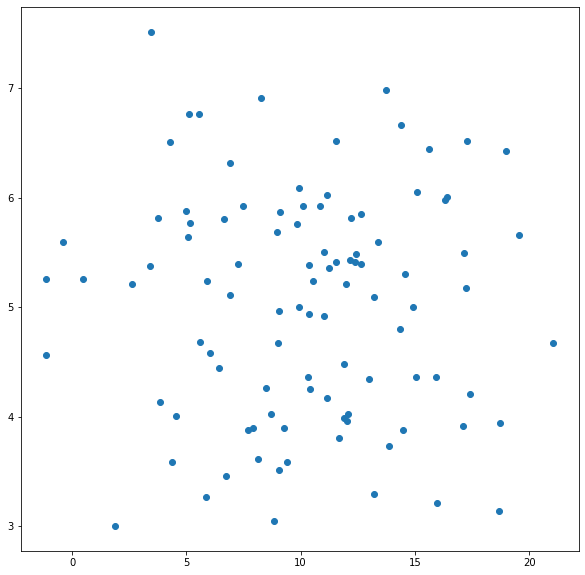

In [23]:
x = np.random.normal((10, 5), (5, 1), (100, 2))

plt.figure(figsize=(10, 10))
plt.plot(x[:,0], x[:,1], marker="o", linestyle = 'None')
plt.show()


### Histogram

- make histogram from data with normal distribution
- make histogram from multiple data series
- make histogram from data with uniform distribution
- make histogram of sum of a multiple (2, 3, 4, 5, 10, 100) same uniform distributions 

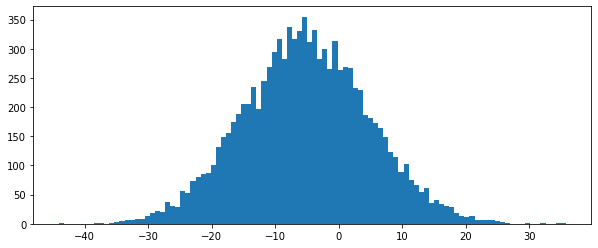

In [13]:
x = np.random.normal(-5, 10, 10000)

plt.figure(figsize=(10, 4))
plt.hist(x, bins=100)
plt.show()

### Boxplot

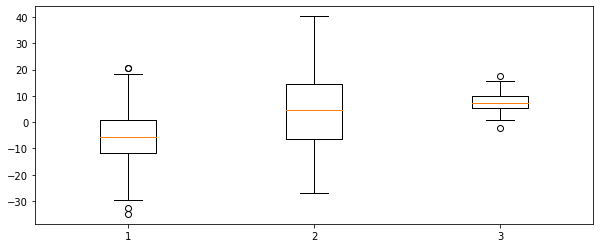

In [14]:
x = [
    np.random.normal(-5, 10, 100),
    np.random.normal(5, 15, 100),
    np.random.normal(8, 3, 100)
]

plt.figure(figsize=(10, 4))
plt.boxplot(x)
plt.show()

## Correlation

* find a lag between two signals via maximum correlation

In [28]:
N = 10000
x = 5 * np.sin(np.linspace(0,20,N)) + np.random.normal(0,1,N)
y = 5 * np.sin(np.linspace(5,25,N)) + np.random.normal(0.5,0.5,N)

np.corrcoef(x, y)

array([[1.        , 0.23409866],
       [0.23409866, 1.        ]])

## Curve fit

* try to fit different functions on different data
* predict the future points with parameters you find

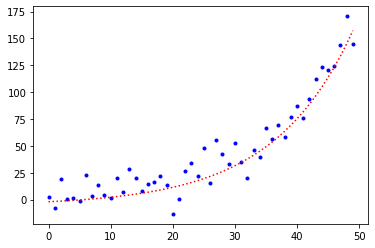

In [4]:
N = 50
x = np.linspace(0, 5, N)
y = 2 + 3 * np.exp(x * 0.8) + np.random.normal(0, 10, N)

(a, b, c, d), _ = optimize.curve_fit(
        lambda x, a, b, c, d: d + a * (1 + np.exp(b * x + c)), x, y, p0=(0, 0, 0, 0)) 


yp = d + a * np.exp(b * x + c)

plt.plot(y, "b.")
plt.plot(yp, "r:")
plt.show()

## Datasets

### Covid CZ

In [5]:
URL_BASE = 'https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/nakazeni-vyleceni-umrti-testy.csv'
URL_HOSP = 'https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/hospitalizace.csv'
dataframe_base = pd.read_csv(URL_BASE, index_col="datum")
dataframe_hosp = pd.read_csv(URL_HOSP, index_col="datum")
data = dataframe_base.join(dataframe_hosp)

In [6]:
data.tail(10)
data.keys()

Index(['kumulativni_pocet_nakazenych', 'kumulativni_pocet_vylecenych',
       'kumulativni_pocet_umrti', 'kumulativni_pocet_testu',
       'kumulativni_pocet_ag_testu', 'prirustkovy_pocet_nakazenych',
       'prirustkovy_pocet_vylecenych', 'prirustkovy_pocet_umrti',
       'prirustkovy_pocet_provedenych_testu',
       'prirustkovy_pocet_provedenych_ag_testu', 'id', 'pacient_prvni_zaznam',
       'kum_pacient_prvni_zaznam', 'pocet_hosp', 'stav_bez_priznaku',
       'stav_lehky', 'stav_stredni', 'stav_tezky', 'jip', 'kyslik', 'hfno',
       'upv', 'ecmo', 'tezky_upv_ecmo', 'umrti', 'kum_umrti'],
      dtype='object')

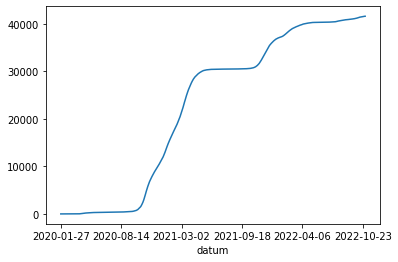

In [7]:
data["kumulativni_pocet_umrti"].plot()
plt.show()